In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data=pd.read_csv('C:\\Users\\lenovo\\OneDrive\\data science\\assignment\\linear regression\\Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA

In [55]:
data.shape

(30, 2)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [57]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [58]:
data.duplicated().sum()

0

In [59]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

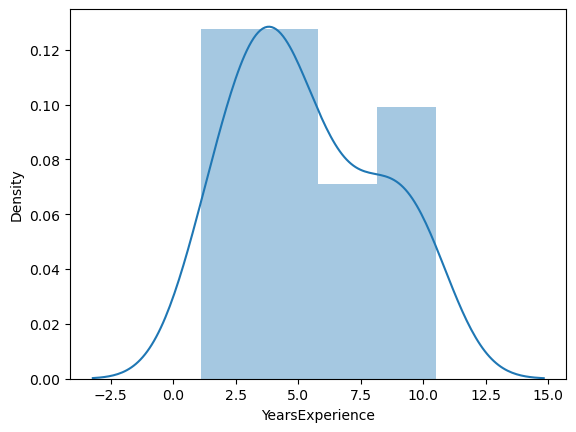

In [60]:
sns.distplot(data['YearsExperience'])

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

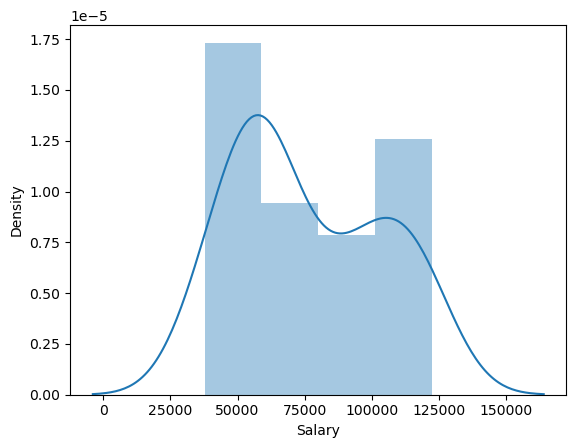

In [61]:
sns.distplot(data['Salary'])

<AxesSubplot:>

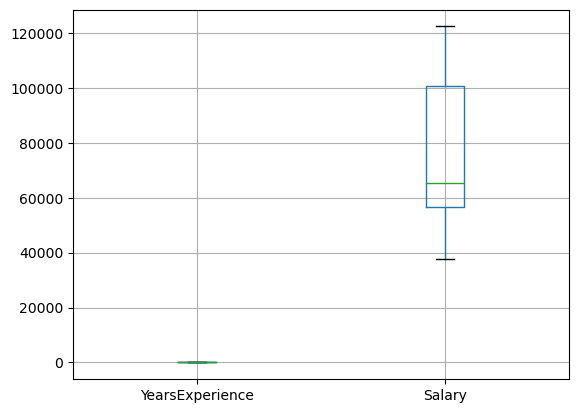

In [62]:
data.boxplot()

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

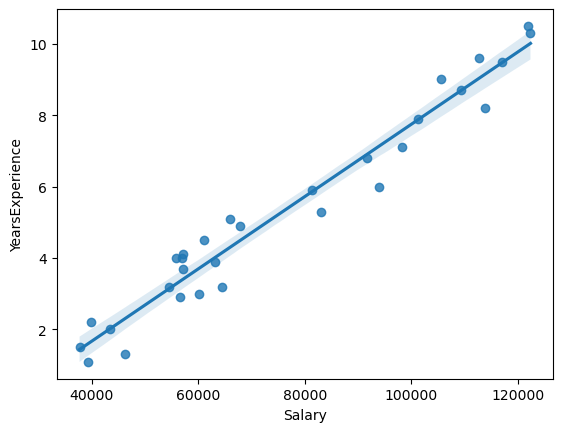

In [63]:
sns.regplot(x=data['Salary'],y=data['YearsExperience'],data=data)

# correlation analysis

In [64]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


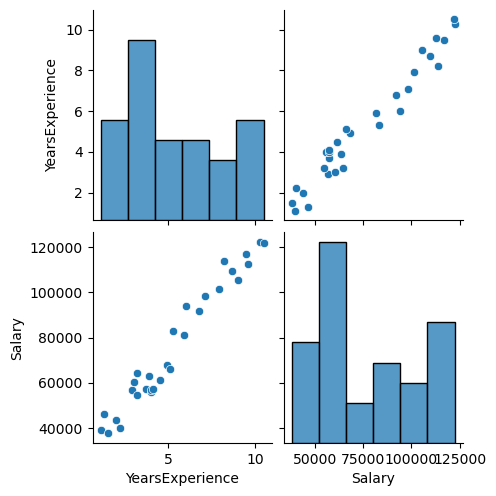

In [65]:
sns.pairplot(data)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

# Transformations

In [67]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [147]:
data1=norm_func(data.YearsExperience)
data1.head()

0    0.000000
1    0.021277
2    0.042553
3    0.095745
4    0.117021
Name: YearsExperience, dtype: float64

In [150]:
data2=pd.DataFrame(data1,columns=['YearsExperience'])
data2['Salary']=data.Salary

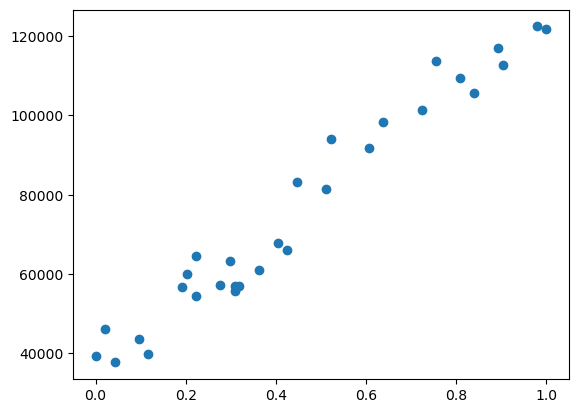

In [151]:
plt.scatter(data2.YearsExperience,data2.Salary)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

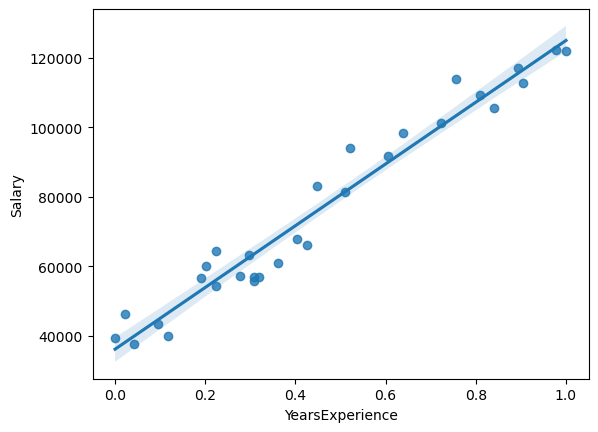

In [152]:
sns.regplot(data2.YearsExperience,data2.Salary)

# model building

In [153]:
model=smf.ols('Salary~YearsExperience',data=data2).fit()

In [154]:
model.params

Intercept          36187.158752
YearsExperience    88829.645822
dtype: float64

In [155]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
=========================================================================
Model:                OLS                Adj. R-squared:       0.955     
Dependent Variable:   Salary             AIC:                  606.8823  
Date:                 2022-11-15 00:45   BIC:                  609.6847  
No. Observations:     30                 Log-Likelihood:       -301.44   
Df Model:             1                  F-statistic:          622.5     
Df Residuals:         28                 Prob (F-statistic):   1.14e-20  
R-squared:            0.957              Scale:                3.3505e+07
-------------------------------------------------------------------------
                  Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------------
Intercept       36187.1588 1914.0164 18.9064 0.0000 32266.4738 40107.8437
YearsExperience 88829.6458 3560.2930 24.9501 0.0000 81536.7162 96122.5754
-------------------------------------------------------------------------
Omnibus:                  2.140          Durbin-Watson:             1.648
Prob(Omnibus):            0.343          Jarque-Bera (JB):          1.569
Skew:                     0.363          Prob(JB):                  0.456
Kurtosis:                 2.147          Condition No.:             4    
=========================================================================

"""

# since p value is < 0.05 x  significant to y

In [157]:
model.rsquared

0.9569566641435086

# rsquared/accuracy is 95.695%

# creating the dataframe to store respective values

In [163]:
data2['pred_values']=model.fittedvalues

In [164]:
data2['error']=model.resid

In [165]:
data2['error_sqrd']=(model.resid)**2

In [166]:
data2.head()

,YearsExperience,Salary,pred_values,error,error_sqrd
0,0.000000,39343.0,36187.158752,3155.841248,9.959334e+06
1,0.021277,46205.0,38077.151217,8127.848783,6.606193e+07
2,0.042553,37731.0,39967.143681,-2236.143681,5.000339e+06
3,0.095745,43525.0,44692.124842,-1167.124842,1.362180e+06
4,0.117021,39891.0,46582.117306,-6691.117306,4.477105e+07


In [167]:
data2

,YearsExperience,Salary,pred_values,error,error_sqrd
0,0.000000,39343.0,36187.158752,3155.841248,9.959334e+06
1,0.021277,46205.0,38077.151217,8127.848783,6.606193e+07
2,0.042553,37731.0,39967.143681,-2236.143681,5.000339e+06
3,0.095745,43525.0,44692.124842,-1167.124842,1.362180e+06
4,0.117021,39891.0,46582.117306,-6691.117306,4.477105e+07
5,0.191489,56642.0,53197.090931,3444.909069,1.186740e+07
6,0.202128,60150.0,54142.087163,6007.912837,3.609502e+07
7,0.223404,54445.0,56032.079627,-1587.079627,2.518822e+06
8,0.223404,64445.0,56032.079627,8412.920373,7.077723e+07
9,0.276596,57189.0,60757.060788,-3568.060788,1.273106e+07


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

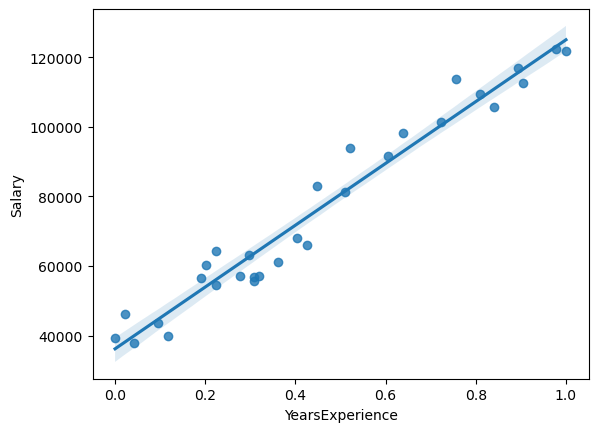

In [168]:
sns.regplot(x=data2.YearsExperience,y=data2.Salary,data=data1)

# residual analysis

In [174]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

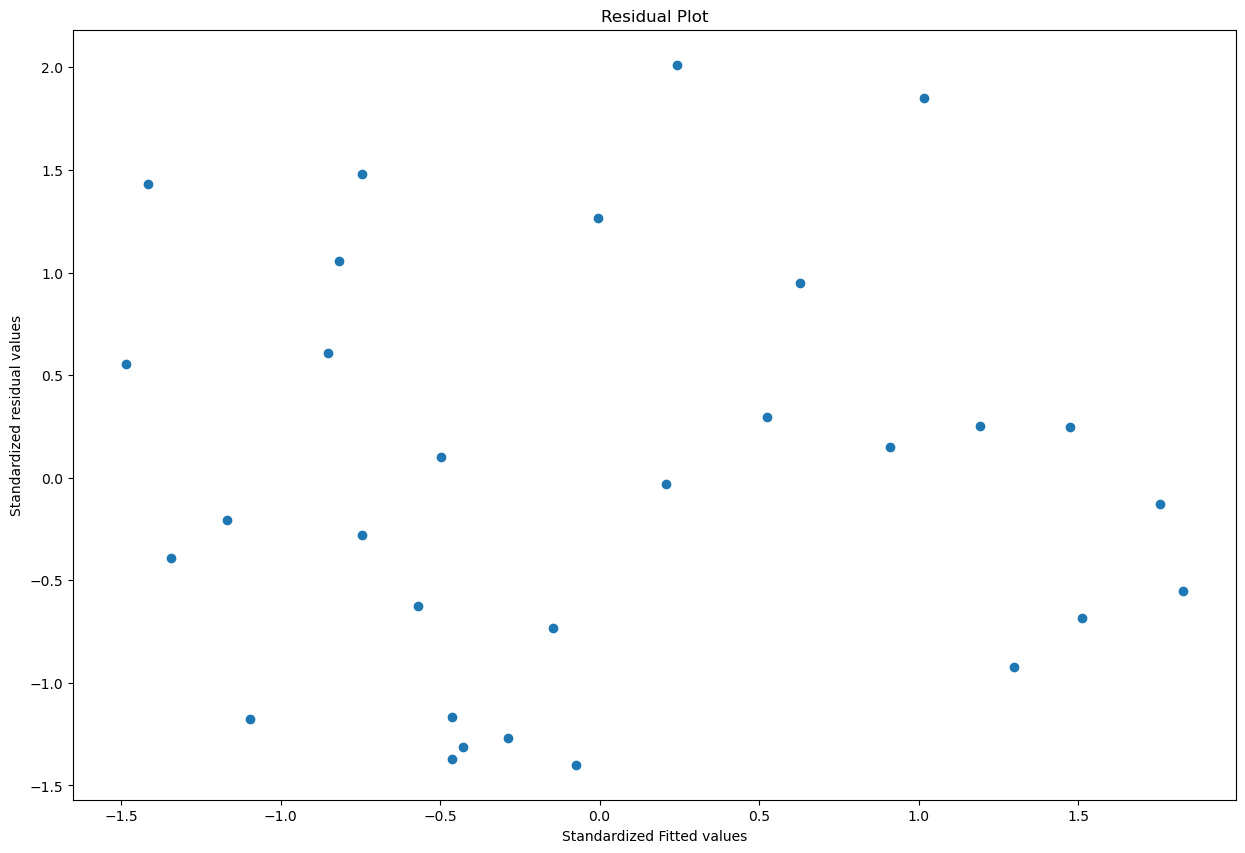

In [175]:
plt.figure(figsize=(15,10))
scatterplot=plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [169]:
import statsmodels.api as sm

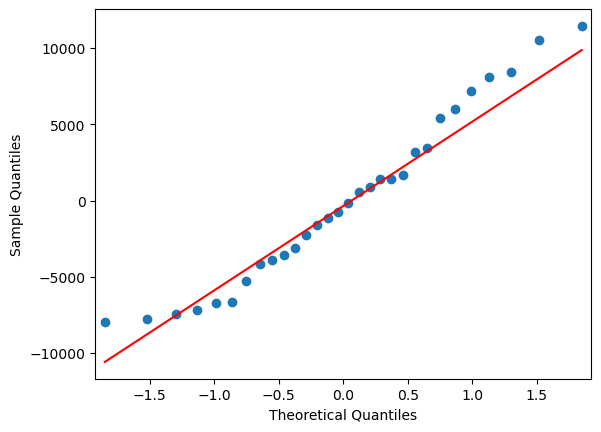

In [170]:
resid=sm.qqplot(model.resid,line='q')

In [ ]:
# predicting new data

In [171]:
data_new=pd.Series([1,3,4,4.5,8,9,12,15])

In [172]:
df_new=pd.DataFrame(data_new,columns=['YearsExperience'])

In [173]:
model.predict(df_new)

0    1.250168e+05
1    3.026761e+05
2    3.915057e+05
3    4.359206e+05
4    7.468243e+05
5    8.356540e+05
6    1.102143e+06
7    1.368632e+06
dtype: float64